In [134]:
import numpy as np
import random
from random import randint
import operator
from array import *
import operator
import math
import time



#intitila parameters
population_size=100
pc=0.6
pm=0.1

random.seed(random.random())


#fitness function
def fitness(x,y):
    fitness=0
    firstTerm= -1*(abs( 0.5* x * (math.sin(math.sqrt( abs(x)) ) )))
    secondTerm= -1* (abs( y*math.sin(30* math.sqrt(abs(x/float(y))))))
    fitness= firstTerm+secondTerm
    return fitness


#maping functions
def MapBitsToNatural(Number):
    return (int(Number, 2) )


def MapNaturaltoBits(Number):
    return '{0:010b}'.format(Number)


def MapNautalToSearchSpace(x):
    return int((x * 990)/1023)+10




#Cross over function 
def CrossOver(SelectedNumbersDict):
    stopNum=int(population_size/2)
    for i in range(stopNum):
        randnum=random.random()
        if (randnum<= pc):
            num1=SelectedNumbersDict[i]["xy"]
            num2=SelectedNumbersDict[stopNum+i]["xy"]
            crossOver1=num1[0:10]+num2[10:20]
            crossOver2=num2[0:10]+num1[10:20]
            SelectedNumbersDict[i]["xy"]=crossOver1
            SelectedNumbersDict[stopNum+i]["xy"]=crossOver2
    return SelectedNumbersDict

#initialize the population
def InitPopulation():
    generations={}
    for i in range(population_size):
        randomx=random.randint(10,1000)
        randomy=random.randint(10,1000)
        fit=fitness(randomx,randomy)
        xbin=MapNaturaltoBits(randomx)
        ybin=MapNaturaltoBits(randomy)
        xy=str(xbin)+""+str(ybin)
        generations[i]={"xy":xy,"fitness":fit} 
    return generations

#Muntation Function
def Mutation(SelectedNumbersDict):
    for i in range(population_size):
        num=SelectedNumbersDict[i]["xy"]
        newNum=""
        for j in range(len(num)):
            randnum=random.random()
            if (randnum<=pm):
                if (num[j]=='1'):
                    newNum=newNum+str(0)
                else:
                    newNum=newNum+str(1)
            else:
                newNum=newNum+num[j]
        SelectedNumbersDict[i]["xy"]=newNum

    return SelectedNumbersDict



#Convert the fitness from bit sot Natural number and calculate it for each new Genearation
def DecodeAndCalFitness(SelectedNumbersDict):
    bestfit=0
    bestXY=""
    for i in range(population_size):
        num=SelectedNumbersDict[i]["xy"]
        x=num[0:10]
        y=num[10:20]

        xinN=MapBitsToNatural(x)
        mapX=MapNautalToSearchSpace(xinN)
        yinN=MapBitsToNatural(y)
        mapY=MapNautalToSearchSpace(yinN)

        fit=fitness(mapX,mapY)
        if(fit<bestfit):
            bestfit=fit
            bestXY=num
        SelectedNumbersDict[i]["fitness"]=fit


    return SelectedNumbersDict,bestfit,bestXY



#5-k tournamet for the Selection Funtion of GA
def tournament5(generationDictN):
    NewgenerationDictN={}
    for i in range(population_size):
        ktournament=[]
        bestNum=0
        bestFit=0
        for j in range(5):
            randomNum=generationDictN[random.randint(0,population_size-1)]
            ktournament.append( randomNum  )
            if randomNum["fitness"]<bestFit:
                bestFit=randomNum["fitness"]
                bestNum=randomNum["xy"]
        
        NewgenerationDictN[i]={"xy":bestNum,"fitness":bestFit}
    
    return NewgenerationDictN

#Genetic Algorithm
def GA():
    t=0
    maxIteration=1000
    bestfitness=1
    bestXY=""
    IterFound=0
    generationDictN=InitPopulation()
    while(t< maxIteration):
        SelectedNumbersDict=tournament5(generationDictN)
        SelectedNumbersDict=CrossOver(SelectedNumbersDict)
        SelectedNumbersDict=Mutation(SelectedNumbersDict)
        generationDictN,bestfit,bestXandY=DecodeAndCalFitness(SelectedNumbersDict)
        if (bestfit<bestfitness):
            bestfitness=bestfit
            bestXY=bestXandY
            IterFound=t
        t=t+1
    return bestfitness,bestXY,IterFound

        

bestfitness,bestXY,IterFound=GA()


x=bestXY[0:10]
y=bestXY[10:20]

xinN=MapBitsToNatural(x)
mapX=MapNautalToSearchSpace(xinN)
yinN=MapBitsToNatural(y)
mapY=MapNautalToSearchSpace(yinN)

print (bestfitness,mapX,mapY,IterFound)

-1356.482683119401 903 917 58


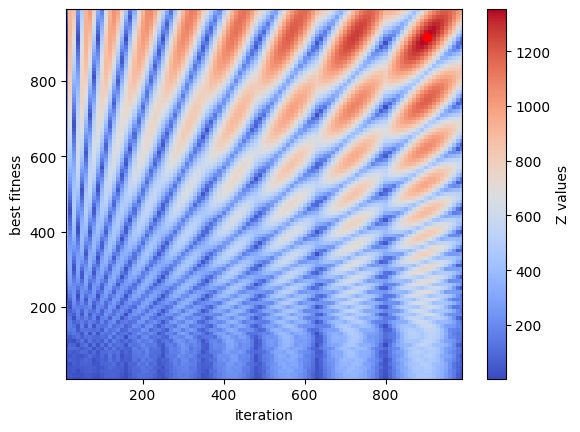

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Generate data
X = np.arange(10, 1000, 10)
Y = np.arange(10, 1000, 10)
X, Y = np.meshgrid(X, Y)
Z = (abs(0.5 * X * (np.sin(np.sqrt(abs(X)))))) + (abs(Y * np.sin(30 * np.sqrt(abs(X / Y)))))

# Create a color plot
plt.pcolormesh(X, Y, Z, cmap=cm.coolwarm, shading='auto')

# Add colorbar
plt.colorbar(label='Z values')

# Set axis limits
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
# plt.show()


#plot the best fitness
plt.plot(mapX,mapY,'ro')
plt.ylabel('best fitness')
plt.xlabel('iteration')
plt.show()
